In [ ]:
%cd "/content/drive/MyDrive/My Projects/IMDB-sentiment-analysis"

/content/drive/MyDrive/My Projects/IMDB-sentiment-analysis


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import nltk
import re

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# to show the whole column values
# pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv("IMDB_Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.shape

(50000, 2)

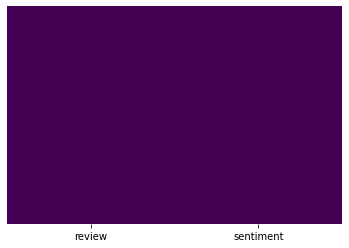

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

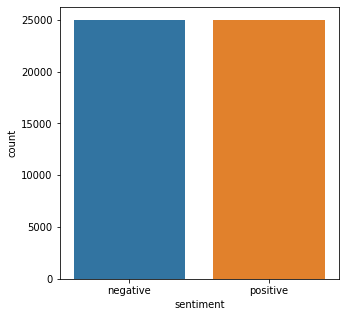

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 5, 5
label_counts = data["sentiment"].value_counts().reset_index()
label_counts.columns = ["sentiment" , "count"]

ax = sns.barplot(x="sentiment", y="count", data=label_counts)

In [ ]:
X = data.drop("sentiment", axis = 1)
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
y = data["sentiment"]
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [ ]:
len(X["review"])

50000

In [ ]:
X["review"][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [ ]:
# iterate through each and every review, remove HTML tags,
# remove every punctuation and number in the review, lower 
# the text, divide each phrase and sentence into words
# apply stemming and remove stop words then append cleaned 
# text to the list 

ps = PorterStemmer()
corpus = []
for i in range(len(X["review"])):
  CLEAN = re.compile("<.*?>")    # to remove everything between "<>"
  result = re.sub(CLEAN, " ", X["review"][i])
  result = re.sub("[^a-zA-Z]" , " " , result)
  result = result.lower()
  result = result.split()   # to break sentences into words
  word = [ps.stem(word) for word in result if word not in stopwords.words("english")]
  result = " ".join(word)
  corpus.append(result)

In [ ]:
corpus[2431]

'watch tenant interpret horror movi use mani trope genr sinist apart suspici neighbor apparit mysteri hallucin life hero trelkovski seem surround evil secret forc tri drive mad last time watch challeng initi interpret movi horror movi horror sens kafka novel horror fact movi understood liter level lone man slowli becom crazi without extern influenc polanski made career three movi deal mad repuls particularli like develop mad heroin never convinc rosemari babi heroin driven mad evil forc tenant might best studi paranoia ever made cinema trelkovski young man rent apart woman kill becom obsess slowli start becom wear cloth put makeup talk like possess spirit let wild imagin get best hesit real imaginari polanski never resolv make fascin movi mani event movi attribut supernatur easili normal caus viewer decid believ although favorit polanski movi nevertheless good exampl abil creat suspens portray mad convinc term technic speak marvel suffic say collabor film compos philipp sard legendari 

In [ ]:
corpus = pd.Series(corpus)
y = pd.Series(y)

cleaned_data = pd.concat([corpus, y], axis = 1)
cleaned_data.rename(columns = {0 : "review", 1 : "sentiment"}, inplace=True) 
cleaned_data.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [ ]:
cleaned_data["review"][1222]

'wild rebel fun bad way also frustrat due actual good least workabl element stori deal race car driver steve alaimo get mix group biker call satan angel hang around lot decid rob bank meanwhil alaimo also get recruit cop report back angel rob next even film realli date though cours carri significantli crude stupid music film band stage one scene alaimo perform could call drek regular gener score care taken filmmak put littl logic direct better actor part major dislik toward film hellcat almost left littl indiffer could come unpredict come stupid thing like name florida town citrusvil ho ho complet un worthi mysteri scienc theater statu late commentari good movi even twice almost want hear charact screen say case might worth wild rebel might good time got six pack low expect watch'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

cleaned_data["sentiment"]=lb.fit_transform(data["sentiment"])

In [ ]:
cleaned_data.to_csv("cleaned_data.csv")